In [93]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.coordinates as coord
import astropy.units as u
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

In [10]:
with open('../data/catarina_cadence/file_test_wfd_nikki_000.pckl', 'rb') as f:
    cadence = pickle.load(f)
with open('../data/catarina_cadence/file_test_wfd_nikki_metadata_000.pckl', 'rb') as f:
    meta = pickle.load(f)


In [36]:
print(meta.keys())

['SNID', 'IAUC', 'FAKE', 'RA', 'DEC', 'PIXSIZE', 'NXPIX', 'NYPIX', 'SNTYPE', 'NOBS', 'PTROBS_MIN', 'PTROBS_MAX', 'MWEBV', 'MWEBV_ERR', 'REDSHIFT_HELIO', 'REDSHIFT_HELIO_ERR', 'REDSHIFT_FINAL', 'REDSHIFT_FINAL_ERR', 'VPEC', 'VPEC_ERR', 'HOSTGAL_NMATCH', 'HOSTGAL_NMATCH2', 'HOSTGAL_OBJID', 'HOSTGAL_FLAG', 'HOSTGAL_PHOTOZ', 'HOSTGAL_PHOTOZ_ERR', 'HOSTGAL_SPECZ', 'HOSTGAL_SPECZ_ERR', 'HOSTGAL_RA', 'HOSTGAL_DEC', 'HOSTGAL_SNSEP', 'HOSTGAL_DDLR', 'HOSTGAL_CONFUSION', 'HOSTGAL_LOGMASS', 'HOSTGAL_LOGMASS_ERR', 'HOSTGAL_LOGSFR', 'HOSTGAL_LOGSFR_ERR', 'HOSTGAL_LOGsSFR', 'HOSTGAL_LOGsSFR_ERR', 'HOSTGAL_COLOR', 'HOSTGAL_COLOR_ERR', 'HOSTGAL_ELLIPTICITY', 'HOSTGAL_OBJID2', 'HOSTGAL_SQRADIUS', 'HOSTGAL_OBJID_UNIQUE', 'HOSTGAL_MAG_u', 'HOSTGAL_MAG_g', 'HOSTGAL_MAG_r', 'HOSTGAL_MAG_i', 'HOSTGAL_MAG_z', 'HOSTGAL_MAG_Y', 'HOSTGAL_MAGERR_u', 'HOSTGAL_MAGERR_g', 'HOSTGAL_MAGERR_r', 'HOSTGAL_MAGERR_i', 'HOSTGAL_MAGERR_z', 'HOSTGAL_MAGERR_Y', 'HOSTGAL2_OBJID', 'HOSTGAL2_FLAG', 'HOSTGAL2_PHOTOZ', 'HOSTGAL2_P

In [5]:
print(cadence[0].keys())

['MJD', 'BAND', 'CCDNUM', 'FIELD', 'PHOTFLAG', 'PHOTPROB', 'FLUXCAL', 'FLUXCALERR', 'PSF_SIG1', 'PSF_SIG2', 'PSF_RATIO', 'SKY_SIG', 'SKY_SIG_T', 'RDNOISE', 'ZEROPT', 'ZEROPT_ERR', 'GAIN', 'XPIX', 'YPIX', 'SIM_FLUXCAL_HOSTERR', 'SIM_MAGOBS']


In [6]:
cadence[1]

MJD,BAND,CCDNUM,FIELD,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,PSF_SIG2,PSF_RATIO,SKY_SIG,SKY_SIG_T,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,XPIX,YPIX,SIM_FLUXCAL_HOSTERR,SIM_MAGOBS
float64,bytes2,int16,bytes12,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
60240.027,z,-9,WFD,0,-9.0,20.15378,19.707264,2.35,0.0,0.0,53.29,0.0,0.25,30.98,0.005,1.0,-9.0,-9.0,0.0,98.92929
60240.0517,Y,-9,WFD,0,-9.0,31.257029,37.336407,2.09,0.0,0.0,46.71,0.0,0.25,30.0,0.005,1.0,-9.0,-9.0,0.0,98.94083
60396.338,Y,-9,WFD,0,-9.0,-3.9665267,31.444077,2.38,0.0,0.0,70.95,0.0,0.35,30.78,0.005,1.0,-9.0,-9.0,0.0,98.94083
60414.3818,r,-9,WFD,0,-9.0,-3.3835437,8.2385235,3.24,0.0,0.0,24.5,0.0,0.25,31.5,0.005,1.0,-9.0,-9.0,0.0,98.87861
60414.3934,i,-9,WFD,0,-9.0,-16.942501,9.485029,2.47,0.0,0.0,31.88,0.0,0.25,31.3,0.005,1.0,-9.0,-9.0,0.0,98.90733
60422.3937,Y,-9,WFD,0,-9.0,3.0670788,23.66799,2.14,0.0,0.0,63.34,0.0,0.35,30.85,0.005,1.0,-9.0,-9.0,0.0,98.94083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61303.0746,Y,-9,WFD,0,-9.0,-18.646507,34.588516,2.12,0.0,0.0,45.98,0.0,0.25,30.08,0.005,1.0,-9.0,-9.0,0.0,28.765585
61304.0669,z,-9,WFD,0,-9.0,-14.646816,20.504736,2.34,0.0,0.0,56.79,0.0,0.25,31.0,0.005,1.0,-9.0,-9.0,0.0,29.499138


In [195]:
begin = min(meta['MJD_DETECT_FIRST'])
end = max(meta['MJD_DETECT_FIRST'])
mid = begin + (end - begin)/2
mask1 = np.where(meta['MJD_DETECT_FIRST'] < mid)[0]
mask2 = np.where(meta['MJD_DETECT_FIRST'] > mid)[0]

In [196]:
total_n_obs1 = []
total_n_obs2 = []

for i in range(len(cadence)):
    part1_mask = np.where(cadence[i]['MJD'] < mid)[0]
    part2_mask = np.where(cadence[i]['MJD'] >= mid)[0]
    total_n_obs1.append(len(cadence[i]['MJD'][part1_mask]))
    total_n_obs2.append(len(cadence[i]['MJD'][part2_mask]))

total_n_obs1 = np.array(total_n_obs1)
total_n_obs2 = np.array(total_n_obs2)

In [197]:
n_obs = []

for i in range(len(cadence)):
    SN_range = np.where((cadence[i]['MJD'] >= meta[i]['MJD_DETECT_FIRST']) & 
                        (cadence[i]['MJD'] <= meta[i]['MJD_DETECT_LAST']))[0]
    n_obs.append(len(cadence[i][SN_range]))

n_obs = np.array(n_obs)

In [198]:
total_n_obs = np.array([len(x) for x in cadence])

ra = coord.Angle(meta['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(meta['DEC']*u.degree)

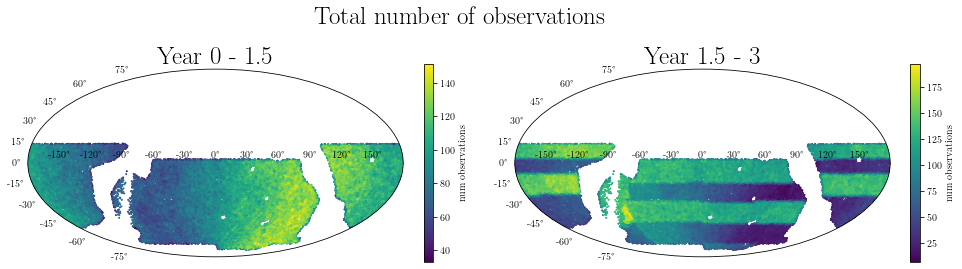

In [201]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra.radian, dec.radian, s=1, c=total_n_obs1)
fig.colorbar(im1, ax=ax1, label="num observations", fraction=0.025)
ax1.set_title("Year 0 - 1.5", fontsize=25)

ax2 = fig.add_subplot(222, projection="mollweide")
im2 = ax2.scatter(ra.radian, dec.radian, s=1, c=total_n_obs2)
fig.colorbar(im2, ax=ax2, label="num observations", fraction=0.025)
ax2.set_title("Year 1.5 - 3", fontsize=25)
fig.suptitle("Total number of observations", fontsize=25)
plt.show()


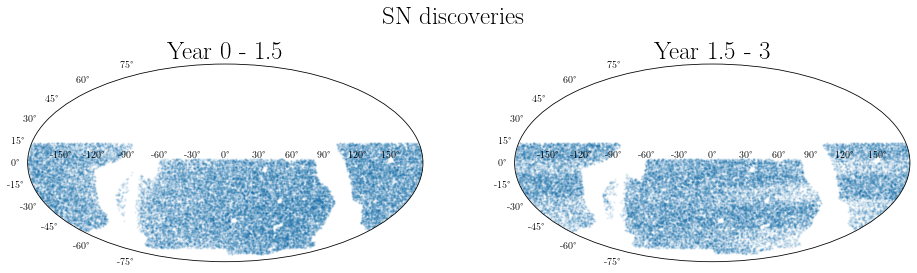

In [208]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra.radian[mask1], dec.radian[mask1], s=2, c='C0', alpha=0.08)
ax1.set_title("Year 0 - 1.5", fontsize=25)

ax2 = fig.add_subplot(222, projection="mollweide")
im2 = ax2.scatter(ra.radian[mask2], dec.radian[mask2], s=2, c='C0', alpha=0.08)
ax2.set_title("Year 1.5 - 3", fontsize=25)
fig.suptitle("SN discoveries", fontsize=25)
plt.show()

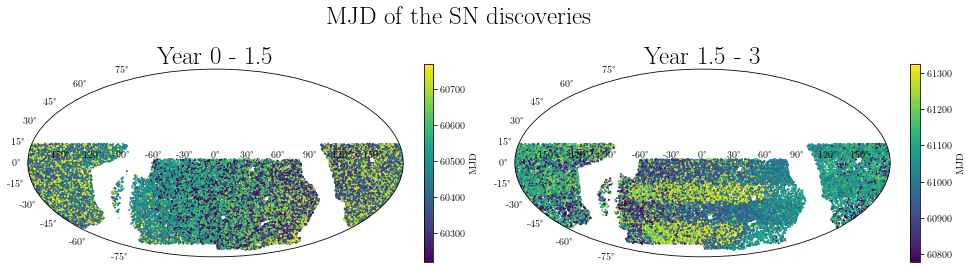

In [199]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra.radian[mask1], dec.radian[mask1], s=1, c=meta['MJD_DETECT_FIRST'][mask1])
fig.colorbar(im1, ax=ax1, label="MJD", fraction=0.025)
ax1.set_title("Year 0 - 1.5", fontsize=25)

ax2 = fig.add_subplot(222, projection="mollweide")
im2 = ax2.scatter(ra.radian[mask2], dec.radian[mask2], s=1, c=meta['MJD_DETECT_FIRST'][mask2])
fig.colorbar(im2, ax=ax2, label="MJD", fraction=0.025)
ax2.set_title("Year 1.5 - 3", fontsize=25)
fig.suptitle("MJD of the SN discoveries", fontsize=25)
plt.show()

In [200]:
print("Number of SNe discovered without rolling cadence: ", len(meta[mask1]))
print("Number of SNe discovered with rolling cadence   : ", len(meta[mask2]))

Number of SNe discovered without rolling cadence:  42428
Number of SNe discovered with rolling cadence   :  35731


Mean / median of number of observations per object without rolling cadence:  12.32  /  10.0
Mean / median of number of observations per object with rolling cadence   :  14.64  /  10.0


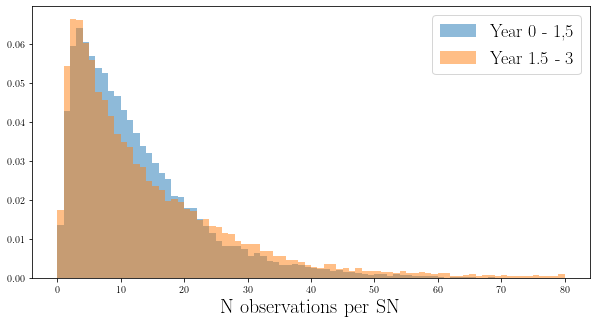

In [202]:
print("Mean / median of number of observations per object without rolling cadence: ", 
      np.around(np.mean(n_obs[mask1]), 2), " / ", np.around(np.median(n_obs[mask1]), 2))
print("Mean / median of number of observations per object with rolling cadence   : ", 
      np.around(np.mean(n_obs[mask2]), 2), " / ", np.around(np.median(n_obs[mask2]), 2))

bins = 80
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.hist(n_obs[mask1], bins=bins, alpha=0.5, density=True, range=(0, 80), label="Year 0 - 1,5")
ax.hist(n_obs[mask2], bins=bins, alpha=0.5, density=True, range=(0, 80), label="Year 1.5 - 3")
ax.set_xlabel("N observations per SN", fontsize=20)
ax.legend(fontsize=18)
plt.show()

In [59]:
obj_data, obj_name = _clean_obj_data(cadence[5])

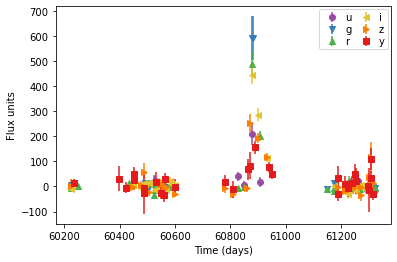

In [62]:
plot_obj_and_model(obj_data)
# plt.xlim(60800, 61000)

(array([14., 39., 36., 41., 53., 23., 18.,  6.,  4.,  5.,  5.,  4.,  0.,
         1.,  2.]),
 array([1.22     , 1.3866667, 1.5533334, 1.72     , 1.8866667, 2.0533333,
        2.22     , 2.3866668, 2.5533333, 2.72     , 2.8866668, 3.0533333,
        3.22     , 3.3866668, 3.5533333, 3.72     ], dtype=float32),
 <BarContainer object of 15 artists>)

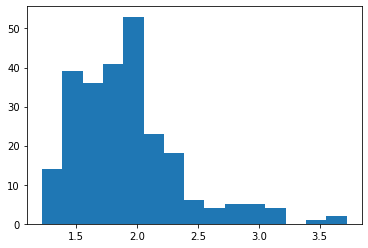

In [24]:
psf = cadence[0]['PSF_SIG1']
plt.hist(psf, bins=15)

In [45]:
colours = {'sdssu': '#6614de', 'sdssg': '#007718', 'sdssr': '#b30100',
           'sdssi': '#d35c00', 'sdssz': 'k', 'desg': '#007718',
           'desr': '#b30100', 'desi': '#d35c00', 'desz': 'k',
           'lsstu': '#984ea3', 'lsstg': '#377eb8', 'lsstr': '#4daf4a',
           'lssti': '#e3c530', 'lsstz': '#ff7f00', 'lssty': '#e41a1c'}

sntypes = {1: 'Ia', 2: 'II', 21: 'IIn', 22: 'IIP', 23: 'IIL',
           3: 'Ibc', 32: 'Ib', 33: 'Ic', 66: 'other'}

markers = {'desg': '^', 'desr': 'o', 'desi': 's', 'desz': '*',
           'lsstu': 'o', 'lsstg': 'v', 'lsstr': '^',
           'lssti': '<', 'lsstz': '>', 'lssty': 's'}

labels = {'desg': 'g', 'desr': 'r', 'desi': 'i', 'desz': 'z'}

In [26]:
import numpy as np

In [23]:
def _clean_obj_data(obj_data):
    """
    Make the event data consistent with snmachine.
    Parameters
    ----------
    obj_data :  astropy.table.table
        Observations of the event.
    Returns
    -------
    obj_data :  astropy.table.table
        Observations of the event.
    obj_name : str
        Name of the event.
    """
    
    # snmachine and SNANA use a different denomination
    obj_data.rename_columns(names=['FLUXCAL', 'FLUXCALERR', 'MJD'],
                            new_names=['flux', 'flux_error', 'mjd'])
    # Rename `filter` values as per `snmachine` convention
    obj_pb = list(obj_data['BAND'])
    obj_pb = ['lsst' + x.lower().strip() for x in obj_pb]
    obj_data['filter'] = obj_pb
    # Set detected flag in the observations; corresponds to SNANA flag 13
    is_detected = [('{0:020b}'.format(i))[-13]
                   for i in obj_data['PHOTFLAG']]
    is_detected = np.array(is_detected, dtype=int)
    obj_data['detected'] = np.array(is_detected, dtype=bool)
    # Add the object name to the light curve observations
    obj_name = obj_data.meta['SNID'].astype(str)
    obj_data['object_id'] = obj_name
    return obj_data, obj_name

In [24]:

def plot_obj_and_model(obj_data, obj_model=None, **kwargs):
    """Plot an object observations and the model fitted to them.

    If `obj_model` is not provided, the function only plots the light
    curve observations.

    Parameters
    ----------
    obj_data : pandas.core.frame.DataFrame or astropy.table.Table
        Time, flux, flux error and passbands of the object.
    obj_model : {None, astropy.table.Table, pandas.core.frame.DataFrame},
                optional
        If `None`, only plots `obj_data`. Otherwise, `obj_model` has the
        time, flux, flux error (optional) and passbands of the model
        fitted to the object.
    **kwargs : dict
        Additional keyword arguments that can replace default parameters in
        other funtions:
        - axes : {None, matplotlib.axes}, optional
            If the axes are provided, the figure is plotted on the axes.
            Otherwise, it is plotted directly with `matplotlib`.
        - pb_colors : dict, optional
            Mapping between the passband names and the colours with which
            they are represented. If none mapping is provided, the
            passbands are represented with the default colours.
        - show_title : Bool, default = False
            Whether to show the plot title.
        - title : str, optional
            The title for the plot.
        - show_legend : Bool, default = True
            Whether to show the plot legend.

    Raises
    ------
    AttributeError
        There is a default title if `obj_data` contains the object id and
        redshift accessible through `obj_data.meta['name']` and
        `obj_data.meta['hostgal_photoz']`, respectively.
        Otherwise, if the kwarg `show_title` is `True` a title must be
        provided in the kwarg `title`.
    """
    # Extra plotting parameters passed as kwargs
    if 'axes' in kwargs:
        axes = kwargs['axes']
    else:
        axes = None
    if 'pb_colors' in kwargs:
        pb_colors = kwargs['pb_colors']
    else:
        pb_colors = colours
    if 'show_title' in kwargs:
        show_title = kwargs['show_title']
    else:
        show_title = False
    if 'title' in kwargs:
        title = kwargs['title']
    elif show_title is True:
        try:
            title = 'Object ID: {}\nPhoto-z = {:.3f}'.format(
                obj_data.meta['name'], obj_data.meta['hostgal_photoz'])
        except AttributeError:
            raise AttributeError('No default title available. Provide the'
                                 ' desired title in the kwarg `title`.')
    if 'show_legend' in kwargs:
        show_legend = kwargs['show_legend']
    else:
        show_legend = True

    passbands = ['lsstu', 'lsstg', 'lsstr', 'lssti', 'lsstz', 'lssty']
    for pb in passbands:
        # Get the light curve observations in the chosen passband `pb`
        obj_data_pb = obj_data[obj_data['filter'] == pb]

        # Skip this code block and plot only the light curve observations
        # if no `obj_model` was inputed.
        if obj_model is not None:
            # Get the model observations in the chosen passband `pb`
            obj_model_pb = obj_model[obj_model['filter'] == pb]
            model_flux = obj_model_pb['flux']

            # Plot the model values
            if axes is None:
                plt.plot(obj_model_pb['mjd'], model_flux,
                         color=pb_colors[pb], alpha=.7, label='')
            else:
                axes.plot(obj_model_pb['mjd'], model_flux,
                          color=pb_colors[pb], alpha=.7, label='')
            try:  # if the model has error information, plot it
                model_flux_error = obj_model_pb['flux_error']
                if axes is None:
                    plt.fill_between(x=obj_model_pb['mjd'],
                                     y1=model_flux-model_flux_error,
                                     y2=model_flux+model_flux_error,
                                     color=pb_colors[pb], alpha=.15,
                                     label=None)
                else:
                    axes.fill_between(x=obj_model_pb['mjd'],
                                      y1=model_flux-model_flux_error,
                                      y2=model_flux+model_flux_error,
                                      color=pb_colors[pb], alpha=.15,
                                      label=None)
            except KeyError:  # the model has no error information
                pass

        # Plot the object observations.
        # They are ploted after the models to be on top of these.

        # Get the right marker for the plot
        try:
            marker_pb = markers[pb]
        except KeyError:  # no marker for this passband
            marker_pb = 'o'
        if axes is None:
            plt.errorbar(obj_data_pb['mjd'], obj_data_pb['flux'],
                         obj_data_pb['flux_error'], fmt=marker_pb,
                         color=pb_colors[pb], label=pb[-1])
        else:
            axes.errorbar(obj_data_pb['mjd'], obj_data_pb['flux'],
                          obj_data_pb['flux_error'], fmt=marker_pb,
                          color=pb_colors[pb], label=pb[-1])
    if axes is None:
        plt.xlabel('Time (days)')
        plt.ylabel('Flux units')
    else:
        axes.set_xlabel('Time (days)')
        axes.set_ylabel('Flux units')

    if show_title:
        if axes is None:
            plt.title(title)
        else:
            axes.set_title(title)

    if show_legend:
        if axes is None:
            plt.legend(ncol=2, handletextpad=.3, borderaxespad=.3,
                       labelspacing=.2, borderpad=.3, columnspacing=.4)
        else:
            axes.legend(ncol=2, handletextpad=.3, borderaxespad=.3,
                        labelspacing=.2, borderpad=.3, columnspacing=.4)